In [1]:
! pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 4.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [2]:
import gdown

google_drive_link = f'https://drive.google.com/uc?id=1b0M83I-W4PKQL0o-A8BNVrLpy24yoi-Q'

# Specify the output file name
output_file = 'salem_dataset.zip'

# Download the file
gdown.download(google_drive_link, output_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1b0M83I-W4PKQL0o-A8BNVrLpy24yoi-Q
To: /content/salem_dataset.zip
100%|██████████| 18.9M/18.9M [00:00<00:00, 36.2MB/s]


'salem_dataset.zip'

In [3]:
#Unzip file
import zipfile

def unzip_file(zip_path, extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

zip_file_path = '/content/salem_dataset.zip'
extracted_folder_path = '/content'

unzip_file(zip_file_path, extracted_folder_path)

In [5]:
from ultralytics import YOLO
import cv2

model = YOLO('yolov8s.pt')

results = model.train(data = '/content/data.yaml', imgsz=640, epochs=400, name='train_result')

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data.yaml, epochs=400, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train_result2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 6.23M/6.23M [00:00<00:00, 74.1MB/s]


AMP: checks passed ✅


train: Scanning /content/train/labels... 243 images, 0 backgrounds, 0 corrupt: 100%|██████████| 243/243 [00:00<00:00, 1239.46it/s]

train: New cache created: /content/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 576, len(boxes) = 667. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/valid/labels... 46 images, 0 backgrounds, 0 corrupt: 100%|██████████| 46/46 [00:00<00:00, 1450.61it/s]

val: New cache created: /content/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 32, len(boxes) = 46. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train_result2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train_result2
Starting training for 400 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/400      4.26G      1.366      5.879      1.624         17        640: 100%|██████████| 16/16 [00:09<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all         46         46      0.269      0.164      0.171      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/400       4.3G      1.009      2.561      1.368         15        640: 100%|██████████| 16/16 [00:05<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         46         46      0.807       0.45      0.464      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/400      4.16G     0.9504      1.953      1.307         23        640: 100%|██████████| 16/16 [00:04<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         46         46      0.441      0.589      0.514      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/400      4.15G      1.024      1.858      1.342         11        640: 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         46         46      0.509      0.585      0.576       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/400      4.16G      1.051      1.792      1.355         13        640: 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         46         46      0.596      0.645      0.572      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/400      4.17G      1.094      1.733       1.37         15        640: 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         46         46      0.478      0.769      0.658      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/400      4.16G      1.185        1.8      1.435         12        640: 100%|██████████| 16/16 [00:04<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         46         46      0.593      0.512      0.554      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/400      4.16G      1.139      1.696      1.381         10        640: 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         46         46      0.322      0.632      0.522      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/400      4.15G       1.02      1.499      1.305         25        640: 100%|██████████| 16/16 [00:05<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         46         46      0.393      0.537      0.524      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/400      4.16G      1.013      1.583       1.31          4        640: 100%|██████████| 16/16 [00:04<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         46         46       0.47      0.818      0.671      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/400      4.15G     0.9602      1.393      1.263         10        640: 100%|██████████| 16/16 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         46         46      0.693      0.491      0.707      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/400      4.18G     0.9707      1.429      1.264         21        640: 100%|██████████| 16/16 [00:04<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         46         46      0.555      0.843      0.895       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/400      4.15G     0.9627      1.416      1.292         13        640: 100%|██████████| 16/16 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         46         46      0.626      0.963      0.817      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/400      4.18G      1.033      1.472       1.34         20        640: 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         46         46      0.447      0.766      0.682       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/400      4.16G     0.9564      1.371       1.27         13        640: 100%|██████████| 16/16 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         46         46       0.48      0.796      0.678      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/400      4.16G     0.9794      1.364      1.281         22        640: 100%|██████████| 16/16 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         46         46      0.484      0.934      0.807      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/400      4.18G     0.8809      1.303       1.23          9        640: 100%|██████████| 16/16 [00:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


                   all         46         46       0.55      0.805      0.851      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/400      4.18G     0.9072       1.33       1.27          9        640: 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         46         46      0.558      0.937      0.804      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/400      4.18G      0.917      1.266      1.231         19        640: 100%|██████████| 16/16 [00:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         46         46      0.641      0.855      0.865      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/400      4.14G      0.909      1.279       1.25         10        640: 100%|██████████| 16/16 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         46         46       0.57      0.972      0.817      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/400      4.15G     0.9331      1.255      1.274         16        640: 100%|██████████| 16/16 [00:04<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         46         46      0.564      0.731      0.762      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/400      4.19G     0.9665      1.337      1.295         13        640: 100%|██████████| 16/16 [00:04<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         46         46      0.754      0.782      0.827      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/400      4.16G      0.873      1.155      1.255          7        640: 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         46         46      0.846      0.819      0.909      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/400      4.15G     0.8275      1.147      1.195          6        640: 100%|██████████| 16/16 [00:05<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all         46         46      0.799      0.798      0.899      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/400      4.16G     0.8114      1.093      1.179         19        640: 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         46         46      0.512      0.863      0.803      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/400      4.15G     0.8728      1.207      1.217         17        640: 100%|██████████| 16/16 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         46         46      0.569      0.904       0.86      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/400      4.15G     0.8502      1.142      1.228         23        640: 100%|██████████| 16/16 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         46         46      0.545      0.944      0.809      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/400      4.15G     0.8752      1.176      1.233         22        640: 100%|██████████| 16/16 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         46         46      0.796      0.783      0.852      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/400      4.16G     0.8992      1.233      1.241         16        640: 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         46         46      0.609          1      0.834      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/400      4.18G     0.8459      1.127      1.204         14        640: 100%|██████████| 16/16 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         46         46      0.696      0.806      0.803      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/400      4.15G     0.8981      1.189      1.246         16        640: 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         46         46      0.741      0.817      0.827      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/400      4.18G     0.8267      1.074       1.19         20        640: 100%|██████████| 16/16 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         46         46      0.618      0.957      0.841      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/400      4.16G     0.8394      1.132      1.223         11        640: 100%|██████████| 16/16 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


                   all         46         46      0.873      0.769      0.903      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/400      4.15G     0.8183      1.075      1.195         15        640: 100%|██████████| 16/16 [00:06<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         46         46      0.635       0.98      0.871      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/400      4.16G     0.8289      1.049      1.175         16        640: 100%|██████████| 16/16 [00:04<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         46         46      0.627      0.947      0.882      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/400      4.15G     0.8217      1.011        1.2         13        640: 100%|██████████| 16/16 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         46         46      0.693      0.981      0.844      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/400      4.16G     0.8993      1.126      1.225         14        640: 100%|██████████| 16/16 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         46         46      0.734       0.85       0.91      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/400      4.18G     0.8721      1.139      1.227          9        640: 100%|██████████| 16/16 [00:05<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         46         46      0.824      0.832      0.918       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/400      4.16G     0.8177       1.09      1.193          7        640: 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         46         46      0.804      0.751      0.786      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/400      4.18G     0.8321      1.034      1.182         25        640: 100%|██████████| 16/16 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         46         46      0.822       0.81      0.881      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/400      4.15G     0.7947      1.019      1.178         17        640: 100%|██████████| 16/16 [00:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         46         46      0.772      0.815      0.824      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/400      4.14G     0.8036      1.008      1.167         26        640: 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         46         46      0.927      0.711      0.827      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/400      4.18G     0.7853      1.024      1.156         11        640: 100%|██████████| 16/16 [00:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         46         46      0.896      0.836      0.874      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/400      4.18G     0.8243      1.023      1.185         12        640: 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all         46         46      0.659      0.939      0.927      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/400      4.14G     0.7864     0.9704      1.179         13        640: 100%|██████████| 16/16 [00:05<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         46         46      0.856      0.824      0.984      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/400      4.15G     0.7708      1.079      1.176          7        640: 100%|██████████| 16/16 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         46         46        0.8      0.787      0.936      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/400      4.18G     0.8346       1.03      1.214          6        640: 100%|██████████| 16/16 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         46         46      0.691          1      0.956        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/400      4.15G     0.8091     0.9947      1.178          8        640: 100%|██████████| 16/16 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         46         46      0.822      0.826      0.954      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/400      4.31G     0.7533     0.9754      1.155         15        640: 100%|██████████| 16/16 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         46         46      0.682      0.926      0.843      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/400      4.31G     0.7894     0.9631      1.176         11        640: 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         46         46      0.845      0.828      0.807      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/400      4.16G     0.7653     0.9253      1.157         17        640: 100%|██████████| 16/16 [00:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         46         46      0.776      0.739      0.775      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/400      4.31G     0.7446     0.8863      1.148         23        640: 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         46         46      0.692      0.972      0.899      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/400      4.15G     0.7561      0.933      1.166         20        640: 100%|██████████| 16/16 [00:05<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         46         46      0.797      0.938      0.917      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/400      4.15G     0.7603       0.88      1.148         19        640: 100%|██████████| 16/16 [00:04<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         46         46      0.879      0.861      0.976      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/400      4.16G      0.758     0.9364      1.146         17        640: 100%|██████████| 16/16 [00:05<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         46         46      0.929       0.84      0.985      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/400      4.15G     0.7761     0.9237      1.158         17        640: 100%|██████████| 16/16 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         46         46       0.83      0.843      0.981       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/400      4.15G     0.7416     0.8572      1.148         11        640: 100%|██████████| 16/16 [00:04<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         46         46      0.727      0.948      0.935      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/400      4.18G     0.7479     0.8759      1.145         13        640: 100%|██████████| 16/16 [00:04<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         46         46      0.707      0.973       0.88      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/400      4.15G     0.7169     0.8708      1.145         17        640: 100%|██████████| 16/16 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         46         46      0.874       0.93      0.942      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/400      4.15G     0.7204     0.8492      1.137          7        640: 100%|██████████| 16/16 [00:05<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         46         46      0.858      0.815      0.939      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/400      4.18G     0.7243      0.875      1.132         24        640: 100%|██████████| 16/16 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         46         46      0.867       0.78      0.885      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/400      4.16G     0.7048     0.8159      1.145         11        640: 100%|██████████| 16/16 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         46         46      0.849      0.843      0.892      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/400      4.16G     0.7219     0.8561      1.139         10        640: 100%|██████████| 16/16 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         46         46      0.746      0.954       0.95      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/400      4.15G     0.7263     0.8045      1.133         14        640: 100%|██████████| 16/16 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         46         46      0.866      0.822      0.934       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/400      4.15G     0.7503     0.8811      1.134          9        640: 100%|██████████| 16/16 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         46         46      0.882      0.839      0.876      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/400      4.15G      0.708     0.8102      1.132          8        640: 100%|██████████| 16/16 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         46         46      0.908      0.846      0.862      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/400      4.19G     0.6905     0.7904      1.108         22        640: 100%|██████████| 16/16 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]


                   all         46         46      0.751      0.954      0.917      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/400      4.15G     0.7199     0.8267      1.132         22        640: 100%|██████████| 16/16 [00:05<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


                   all         46         46      0.863      0.851      0.921      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/400      4.16G     0.6805     0.8063      1.106         18        640: 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         46         46      0.872      0.842      0.979      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/400      4.15G     0.6789     0.7895      1.112         20        640: 100%|██████████| 16/16 [00:05<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         46         46      0.778      0.962      0.987       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/400      4.16G     0.7349     0.8238      1.137         18        640: 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         46         46        0.9      0.849      0.967      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/400      4.15G     0.6811     0.7898      1.098         22        640: 100%|██████████| 16/16 [00:05<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         46         46      0.893      0.882      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/400      4.15G     0.7364     0.8094      1.151         13        640: 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         46         46      0.917      0.878      0.995      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/400      4.15G     0.6973     0.8306      1.139         12        640: 100%|██████████| 16/16 [00:04<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         46         46      0.874      0.879      0.995      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/400      4.19G      0.667     0.7689       1.09         19        640: 100%|██████████| 16/16 [00:04<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         46         46      0.824      0.878      0.981      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/400      4.15G      0.688     0.7736      1.107         10        640: 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         46         46      0.821       0.88      0.976      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/400      4.15G     0.6642     0.7525      1.092         20        640: 100%|██████████| 16/16 [00:05<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         46         46      0.862          1      0.995      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/400      4.16G     0.6946     0.7652      1.125         12        640: 100%|██████████| 16/16 [00:04<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         46         46      0.834      0.997      0.989      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/400      4.16G     0.6923     0.7796      1.121         19        640: 100%|██████████| 16/16 [00:05<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         46         46       0.81      0.961      0.986       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/400      4.15G       0.65     0.7223      1.087         17        640: 100%|██████████| 16/16 [00:04<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


                   all         46         46      0.904      0.826      0.985      0.853

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/400      4.18G     0.7129     0.7888      1.117         27        640: 100%|██████████| 16/16 [00:06<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


                   all         46         46      0.854       0.82      0.973      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/400      4.16G     0.6621     0.7443       1.09         10        640: 100%|██████████| 16/16 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         46         46      0.891      0.832      0.987      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/400      4.16G     0.7209     0.8572      1.124          6        640: 100%|██████████| 16/16 [00:05<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         46         46      0.795      0.972      0.984      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/400      4.15G     0.6795      0.751      1.112         24        640: 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         46         46      0.792      0.965      0.968      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/400      4.15G     0.6567     0.7201      1.087          6        640: 100%|██████████| 16/16 [00:05<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         46         46      0.679      0.972      0.951      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/400      4.16G     0.6654     0.7305      1.097         11        640: 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


                   all         46         46      0.819      0.889      0.985      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/400      4.16G     0.6466      0.694      1.083         13        640: 100%|██████████| 16/16 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         46         46      0.879      0.847      0.984      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/400      4.15G     0.7234     0.7851      1.145         10        640: 100%|██████████| 16/16 [00:04<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         46         46      0.764      0.995       0.97      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/400      4.15G     0.7318     0.8442      1.134         12        640: 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         46         46      0.798      0.975       0.97      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/400      4.15G     0.6524     0.7165      1.082         17        640: 100%|██████████| 16/16 [00:04<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         46         46      0.701          1      0.981      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/400      4.16G     0.6506     0.7076      1.077         15        640: 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         46         46      0.907      0.859      0.932      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/400      4.15G     0.6658     0.7055      1.086         18        640: 100%|██████████| 16/16 [00:05<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         46         46       0.82      0.981      0.981      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/400      4.18G      0.636     0.6892      1.084         17        640: 100%|██████████| 16/16 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         46         46      0.752      0.972      0.948      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/400      4.15G     0.6433     0.7022      1.099         14        640: 100%|██████████| 16/16 [00:05<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         46         46      0.759      0.995      0.936      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/400      4.16G     0.6682      0.706      1.096         19        640: 100%|██████████| 16/16 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         46         46      0.815      0.962      0.965      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/400      4.15G     0.6386     0.7007      1.066         14        640: 100%|██████████| 16/16 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         46         46      0.882      0.972      0.989      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/400      4.16G     0.6259     0.6477       1.08         14        640: 100%|██████████| 16/16 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         46         46      0.838      0.991       0.97      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/400      4.15G     0.6121      0.657      1.071         20        640: 100%|██████████| 16/16 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         46         46      0.927          1      0.984      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/400      4.16G     0.6633     0.7004      1.095         27        640: 100%|██████████| 16/16 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         46         46      0.905      0.978      0.987      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/400      4.15G     0.6356     0.6278      1.071         12        640: 100%|██████████| 16/16 [00:05<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         46         46      0.922      0.945      0.984      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/400      4.16G     0.6263     0.6426      1.064         13        640: 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         46         46      0.921      0.981      0.992       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/400      4.19G     0.5965     0.6675      1.068         18        640: 100%|██████████| 16/16 [00:05<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         46         46      0.927      0.979      0.995      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/400      4.18G     0.6224     0.6364      1.068         13        640: 100%|██████████| 16/16 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         46         46      0.947          1      0.995      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/400      4.15G     0.6326     0.6604      1.064          8        640: 100%|██████████| 16/16 [00:05<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         46         46      0.928      0.989      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/400      4.18G      0.631      0.629      1.073         15        640: 100%|██████████| 16/16 [00:05<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         46         46      0.921      0.949      0.987      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/400      4.16G     0.6393     0.6532      1.068         16        640: 100%|██████████| 16/16 [00:04<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]


                   all         46         46      0.923      0.937      0.987      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/400      4.16G     0.6081     0.6365      1.062         23        640: 100%|██████████| 16/16 [00:05<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         46         46      0.927      0.983      0.995      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/400      4.15G     0.6225     0.6314      1.068         11        640: 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         46         46      0.894          1      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/400      4.15G     0.5853     0.5969      1.039         21        640: 100%|██████████| 16/16 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         46         46      0.881      0.954      0.987      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/400      4.16G     0.6099     0.6038      1.057         16        640: 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         46         46      0.906      0.954      0.987      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/400      4.16G     0.5918     0.6164      1.043         18        640: 100%|██████████| 16/16 [00:05<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         46         46      0.877      0.879      0.992       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/400      4.15G     0.5987     0.6138      1.042         25        640: 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         46         46      0.887      0.861      0.976      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/400      4.15G     0.6287     0.6454      1.053         21        640: 100%|██████████| 16/16 [00:05<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         46         46       0.87      0.842      0.976      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/400      4.16G     0.6022     0.6082      1.063         12        640: 100%|██████████| 16/16 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         46         46      0.772      0.972      0.963      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/400      4.16G     0.6135      0.637      1.061         19        640: 100%|██████████| 16/16 [00:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         46         46      0.853      0.993       0.99      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/400      4.15G     0.6026     0.5941      1.047          8        640: 100%|██████████| 16/16 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         46         46      0.943      0.998      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/400      4.18G     0.6183     0.6358       1.05         18        640: 100%|██████████| 16/16 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


                   all         46         46      0.891          1      0.995      0.838

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/400      4.18G     0.5772     0.5694      1.027         17        640: 100%|██████████| 16/16 [00:04<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all         46         46      0.885      0.981      0.992       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/400      4.16G     0.5765      0.594      1.039         11        640: 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         46         46      0.907          1      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/400      4.15G     0.5853     0.6186      1.058         17        640: 100%|██████████| 16/16 [00:04<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         46         46      0.949      0.984      0.995      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/400      4.15G     0.5571     0.5744      1.025         26        640: 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         46         46       0.94      0.983      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/400      4.16G     0.6024      0.648      1.048         18        640: 100%|██████████| 16/16 [00:05<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         46         46      0.883      0.973      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/400      4.18G     0.6317     0.6017       1.07         18        640: 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         46         46      0.897       0.85       0.94      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/400      4.15G     0.5737     0.5889      1.026         24        640: 100%|██████████| 16/16 [00:05<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         46         46      0.912      0.866       0.94       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/400      4.15G     0.5752     0.5475      1.031         22        640: 100%|██████████| 16/16 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         46         46      0.924       0.98      0.985      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/400      4.18G     0.5728     0.5933      1.038         11        640: 100%|██████████| 16/16 [00:05<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         46         46      0.897          1      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/400      4.16G     0.5882     0.5888      1.034         13        640: 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         46         46      0.911      0.854       0.94      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/400      4.15G     0.5968     0.5522      1.039         12        640: 100%|██████████| 16/16 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         46         46      0.876      0.831      0.987      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/400      4.15G        0.6     0.5885      1.051         14        640: 100%|██████████| 16/16 [00:04<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]


                   all         46         46      0.866      0.972      0.985      0.861

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/400      4.18G     0.5597     0.5674      1.015         14        640: 100%|██████████| 16/16 [00:05<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         46         46      0.891      0.955      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/400      4.16G     0.5612     0.5501      1.038         14        640: 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         46         46      0.782      0.995      0.971      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/400      4.15G     0.5973      0.585      1.056         13        640: 100%|██████████| 16/16 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         46         46      0.764      0.945      0.965      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/400      4.31G     0.5511     0.5635      1.027         10        640: 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         46         46      0.809      0.989      0.976      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/400      4.13G     0.5723     0.5825      1.043         12        640: 100%|██████████| 16/16 [00:05<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         46         46      0.812       0.99      0.987      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/400      4.19G     0.6081     0.5871      1.049          8        640: 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         46         46      0.833      0.967      0.966      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/400      4.15G     0.5583       0.55       1.02         17        640: 100%|██████████| 16/16 [00:04<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         46         46      0.802      0.972      0.978      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/400      4.18G     0.5647     0.5408      1.029         14        640: 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         46         46      0.762      0.999      0.984      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/400      4.15G     0.5701     0.5559      1.042         11        640: 100%|██████████| 16/16 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         46         46      0.758      0.981      0.962      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/400      4.16G     0.5464     0.5584      1.011         14        640: 100%|██████████| 16/16 [00:04<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         46         46      0.832      0.981      0.969      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/400      4.15G      0.557     0.5574      1.029          6        640: 100%|██████████| 16/16 [00:04<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         46         46       0.91      0.957      0.972      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/400      4.15G     0.5524     0.5353      1.032          9        640: 100%|██████████| 16/16 [00:05<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         46         46      0.802      0.977      0.985      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/400      4.16G     0.5488     0.5668      1.042          7        640: 100%|██████████| 16/16 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         46         46      0.892      0.843      0.981      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/400      4.35G     0.5502     0.5676       1.03         13        640: 100%|██████████| 16/16 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         46         46      0.899      0.843      0.969      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/400      4.15G     0.5323     0.5002     0.9986         17        640: 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         46         46      0.879      0.846      0.926      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/400      4.15G     0.5278     0.5095      1.007         17        640: 100%|██████████| 16/16 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         46         46      0.849      0.848      0.968      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/400      4.15G     0.5495     0.5262      1.017         11        640: 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         46         46      0.824      0.832       0.91      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/400      4.16G     0.5228      0.515      1.011         17        640: 100%|██████████| 16/16 [00:05<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         46         46      0.855      0.815      0.973      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/400      4.15G     0.5441     0.5305      1.026         10        640: 100%|██████████| 16/16 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         46         46      0.713      0.971      0.963      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/400      4.16G     0.5186     0.5429      1.014          7        640: 100%|██████████| 16/16 [00:05<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         46         46      0.839      0.948      0.956      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/400      4.16G     0.5617     0.5524      1.034         12        640: 100%|██████████| 16/16 [00:04<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         46         46      0.908       0.95      0.969      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/400      4.18G     0.5291     0.5043      1.005         20        640: 100%|██████████| 16/16 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         46         46      0.928      0.904      0.987      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/400      4.16G     0.5237     0.5077      1.017         12        640: 100%|██████████| 16/16 [00:05<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         46         46      0.923      0.972      0.995      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/400      4.15G     0.5144     0.4969      1.008         17        640: 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         46         46      0.782          1      0.995       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/400      4.16G     0.5497     0.5352      1.017         14        640: 100%|██████████| 16/16 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         46         46      0.759          1      0.992      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/400      4.16G     0.5404     0.5327      1.021         18        640: 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         46         46      0.913      0.961      0.992      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/400      4.16G     0.5466     0.5201      1.025         12        640: 100%|██████████| 16/16 [00:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all         46         46      0.891      0.838      0.986      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/400      4.16G     0.5437     0.5352      1.031         21        640: 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         46         46      0.807      0.944      0.966      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/400      4.16G     0.5538     0.5303      1.034         14        640: 100%|██████████| 16/16 [00:05<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         46         46      0.885      0.957      0.981      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/400      4.16G     0.5598     0.5228      1.028         16        640: 100%|██████████| 16/16 [00:04<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         46         46      0.748          1      0.989      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/400      4.16G     0.5284     0.4926     0.9934          8        640: 100%|██████████| 16/16 [00:05<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         46         46      0.727          1      0.987       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/400      4.15G     0.5351     0.5305      1.017          6        640: 100%|██████████| 16/16 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         46         46      0.859      0.965      0.974      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/400      4.16G     0.4984     0.4826      1.006          7        640: 100%|██████████| 16/16 [00:05<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         46         46       0.89      0.983      0.976      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/400      4.16G     0.5163     0.4819      1.003         16        640: 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         46         46      0.782      0.999      0.976      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/400      4.18G     0.5178     0.4826      1.003         18        640: 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         46         46      0.879      0.971      0.992       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/400      4.16G     0.5195     0.5027      1.014         14        640: 100%|██████████| 16/16 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         46         46      0.774          1      0.995      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/400      4.15G     0.5317      0.483      1.001         10        640: 100%|██████████| 16/16 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         46         46      0.902          1      0.995      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/400      4.16G      0.524     0.5339      1.014         23        640: 100%|██████████| 16/16 [00:04<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         46         46      0.889      0.995      0.968      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/400      4.15G     0.4893     0.4563     0.9948         14        640: 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         46         46      0.899      0.957      0.976      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/400      4.15G     0.5493     0.4919      1.012         18        640: 100%|██████████| 16/16 [00:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         46         46      0.798      0.972      0.959      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/400      4.18G     0.4984     0.4599     0.9771         22        640: 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         46         46      0.783      0.981      0.975      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/400      4.16G     0.5023     0.5126      1.002         17        640: 100%|██████████| 16/16 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         46         46      0.831      0.976      0.927      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/400      4.18G     0.5076     0.4849     0.9997         15        640: 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         46         46      0.842      0.986      0.926      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/400      4.15G     0.5163     0.4964     0.9991         22        640: 100%|██████████| 16/16 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         46         46       0.75      0.993      0.926      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/400      4.15G     0.5238     0.4797     0.9887         14        640: 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         46         46      0.838      0.856      0.891      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/400      4.15G     0.4713     0.4401     0.9771         17        640: 100%|██████████| 16/16 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         46         46      0.749      0.981      0.964      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/400      4.16G     0.5128     0.4699      1.008         10        640: 100%|██████████| 16/16 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         46         46      0.874      0.975      0.989      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/400      4.16G     0.5022     0.4565     0.9936         14        640: 100%|██████████| 16/16 [00:05<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         46         46      0.891      0.987      0.992      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/400      4.18G     0.4646     0.4376     0.9771         12        640: 100%|██████████| 16/16 [00:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         46         46      0.721          1      0.992      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/400      4.15G     0.4765     0.4497     0.9822          9        640: 100%|██████████| 16/16 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         46         46      0.899      0.851      0.937      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/400      4.33G     0.5018     0.4592     0.9892         11        640: 100%|██████████| 16/16 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         46         46      0.915      0.871       0.94      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/400      4.15G     0.5121      0.486     0.9857         26        640: 100%|██████████| 16/16 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         46         46      0.832      0.971      0.987      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/400      4.15G     0.5146     0.4523     0.9888         17        640: 100%|██████████| 16/16 [00:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         46         46      0.847      0.962      0.981       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/400      4.18G     0.5274      0.496      1.016         14        640: 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         46         46      0.799      0.994      0.987      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/400      4.16G     0.4804     0.4663     0.9983         14        640: 100%|██████████| 16/16 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         46         46        0.8      0.992      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/400      4.15G     0.4706      0.469     0.9831         14        640: 100%|██████████| 16/16 [00:04<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all         46         46      0.874      0.979      0.995      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/400      4.16G      0.481     0.4574      0.983         19        640: 100%|██████████| 16/16 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         46         46       0.91      0.931      0.985      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/400      4.15G     0.5027     0.4784     0.9941         19        640: 100%|██████████| 16/16 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         46         46      0.828      0.976      0.992       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/400      4.16G     0.4832     0.4676     0.9984         18        640: 100%|██████████| 16/16 [00:05<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         46         46      0.873      0.867      0.992      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/400      4.15G     0.5046      0.465     0.9935         13        640: 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         46         46       0.89      0.869       0.94      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/400      4.18G     0.4847     0.4542     0.9861         11        640: 100%|██████████| 16/16 [00:05<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         46         46      0.859      0.856      0.932      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/400      4.18G     0.4951     0.4531     0.9869         19        640: 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         46         46      0.787      0.981      0.912      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/400      4.16G     0.4701     0.4496     0.9704         21        640: 100%|██████████| 16/16 [00:04<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         46         46       0.87      0.981      0.987      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/400      4.15G     0.4744     0.4352     0.9881         11        640: 100%|██████████| 16/16 [00:05<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         46         46      0.945          1      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/400      4.15G     0.5111     0.4696     0.9969         14        640: 100%|██████████| 16/16 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         46         46      0.923      0.989      0.995      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/400      4.18G     0.4632     0.4389     0.9709         18        640: 100%|██████████| 16/16 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         46         46      0.906      0.981      0.995      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/400      4.16G     0.4795     0.4589      0.978         19        640: 100%|██████████| 16/16 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         46         46       0.92       0.99      0.989      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/400      4.15G     0.4632     0.4279     0.9711         16        640: 100%|██████████| 16/16 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         46         46      0.948          1      0.995      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/400      4.15G     0.4677     0.4396     0.9784         13        640: 100%|██████████| 16/16 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         46         46      0.958          1      0.995      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/400      4.16G     0.4488     0.4276     0.9667         23        640: 100%|██████████| 16/16 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         46         46      0.944          1      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/400      4.16G     0.4585     0.4455     0.9751         11        640: 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         46         46      0.926          1      0.995      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/400      4.15G     0.4846     0.4485      1.003         11        640: 100%|██████████| 16/16 [00:05<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         46         46      0.914          1      0.995      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/400      4.16G     0.4466     0.4112     0.9722         11        640: 100%|██████████| 16/16 [00:04<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         46         46      0.942          1      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/400      4.18G     0.4822     0.4569     0.9748         15        640: 100%|██████████| 16/16 [00:05<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         46         46      0.932      0.998      0.995       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/400      4.16G     0.4649     0.4317     0.9689         18        640: 100%|██████████| 16/16 [00:04<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         46         46      0.869      0.981      0.992      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/400      4.15G      0.487     0.4305     0.9809         16        640: 100%|██████████| 16/16 [00:04<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         46         46      0.875      0.981      0.981      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/400      4.18G     0.4853     0.4484     0.9841          6        640: 100%|██████████| 16/16 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         46         46      0.908      0.987      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/400      4.16G     0.4968     0.4573     0.9835         16        640: 100%|██████████| 16/16 [00:04<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         46         46      0.898      0.987      0.995      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/400      4.16G     0.4587     0.4334     0.9627         14        640: 100%|██████████| 16/16 [00:04<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         46         46      0.899      0.988      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/400      4.15G     0.4766     0.4422     0.9782         26        640: 100%|██████████| 16/16 [00:04<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         46         46      0.865      0.983      0.981       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/400      4.15G     0.4826     0.4463     0.9913          7        640: 100%|██████████| 16/16 [00:05<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         46         46      0.854      0.987       0.97      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/400      4.16G     0.4546     0.4359     0.9659         14        640: 100%|██████████| 16/16 [00:05<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         46         46      0.829      0.981       0.97      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/400      4.16G     0.4702     0.4252     0.9886         16        640: 100%|██████████| 16/16 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         46         46      0.812          1      0.952      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/400      4.15G     0.4372     0.3999     0.9516         17        640: 100%|██████████| 16/16 [00:04<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         46         46      0.779          1      0.969      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/400      4.16G      0.464     0.4243     0.9748         16        640: 100%|██████████| 16/16 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         46         46      0.846      0.986      0.969      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/400      4.15G     0.4799     0.4389     0.9808         17        640: 100%|██████████| 16/16 [00:04<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         46         46      0.829      0.995      0.969      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/400      4.16G     0.4482     0.4131     0.9622          8        640: 100%|██████████| 16/16 [00:05<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         46         46      0.747          1      0.932      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/400      4.15G     0.4485     0.4134     0.9571         16        640: 100%|██████████| 16/16 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         46         46      0.877      0.854      0.937      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/400      4.15G     0.4348     0.3921     0.9529         18        640: 100%|██████████| 16/16 [00:05<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         46         46      0.863       0.85      0.935      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/400      4.16G     0.4605     0.4104     0.9772         17        640: 100%|██████████| 16/16 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         46         46      0.888      0.827       0.92      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/400      4.16G     0.4452     0.4232     0.9522          4        640: 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         46         46      0.898      0.832      0.959      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/400      4.16G     0.4775     0.4491     0.9843         12        640: 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         46         46      0.797          1      0.984      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/400      4.16G     0.4619     0.4338     0.9719          8        640: 100%|██████████| 16/16 [00:04<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         46         46      0.872          1       0.94      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/400      4.16G     0.4523     0.4236     0.9584         16        640: 100%|██████████| 16/16 [00:05<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all         46         46      0.821      0.997       0.94      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/400      4.16G     0.4573     0.4395     0.9697         13        640: 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]


                   all         46         46      0.772          1       0.94      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/400      4.15G     0.4794     0.4513     0.9799         23        640: 100%|██████████| 16/16 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         46         46      0.896      0.889       0.94      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/400      4.16G     0.4582     0.4124     0.9714          6        640: 100%|██████████| 16/16 [00:04<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         46         46      0.895      0.889      0.879      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/400      4.18G     0.4546     0.4035     0.9598         20        640: 100%|██████████| 16/16 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         46         46      0.897      0.873      0.827      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/400      4.18G     0.4431     0.4065     0.9624         13        640: 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         46         46      0.888      0.865       0.94      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/400      4.15G     0.4514     0.4034      0.965         24        640: 100%|██████████| 16/16 [00:05<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         46         46      0.881      0.864      0.931      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/400      4.18G     0.4545     0.4175     0.9561         16        640: 100%|██████████| 16/16 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         46         46        0.9      0.868      0.937      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/400      4.16G     0.4408     0.4147     0.9565         26        640: 100%|██████████| 16/16 [00:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         46         46      0.901          1      0.995      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/400      4.19G     0.4298     0.3984     0.9517         17        640: 100%|██████████| 16/16 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         46         46      0.913          1      0.995      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/400      4.15G     0.4398     0.4032     0.9544          9        640: 100%|██████████| 16/16 [00:05<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         46         46      0.897      0.996      0.992      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/400      4.16G     0.4313     0.3727     0.9492         16        640: 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         46         46      0.869      0.996      0.976       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/400      4.15G      0.451     0.4027     0.9775          6        640: 100%|██████████| 16/16 [00:04<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         46         46       0.87          1      0.978      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/400      4.16G      0.476     0.4142     0.9699         17        640: 100%|██████████| 16/16 [00:04<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         46         46      0.795          1       0.94      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/400      4.15G     0.4429      0.394     0.9381         13        640: 100%|██████████| 16/16 [00:04<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         46         46      0.913      0.889       0.94      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/400      4.15G     0.4332     0.3986     0.9422         18        640: 100%|██████████| 16/16 [00:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all         46         46      0.794      0.889      0.884      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/400      4.18G      0.428     0.3808     0.9438         15        640: 100%|██████████| 16/16 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all         46         46      0.894      0.889       0.94      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/400      4.16G     0.4183     0.3841     0.9478          8        640: 100%|██████████| 16/16 [00:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         46         46      0.766          1       0.94       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/400      4.15G     0.4476     0.4034     0.9682         12        640: 100%|██████████| 16/16 [00:04<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         46         46      0.826          1      0.992      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/400      4.15G     0.4494     0.3898     0.9559         10        640: 100%|██████████| 16/16 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         46         46      0.832      0.994      0.984      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/400      4.15G     0.4601     0.4025     0.9659         18        640: 100%|██████████| 16/16 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         46         46      0.752          1      0.929      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/400      4.15G     0.4306     0.3904     0.9329         24        640: 100%|██████████| 16/16 [00:05<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         46         46      0.897      0.886       0.94      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/400      4.15G     0.4156     0.3762     0.9499         15        640: 100%|██████████| 16/16 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         46         46      0.892      0.889       0.94      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/400      4.16G     0.4162     0.3761     0.9511         12        640: 100%|██████████| 16/16 [00:05<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         46         46      0.871      0.889       0.94      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/400      4.18G     0.4092     0.3761     0.9459         16        640: 100%|██████████| 16/16 [00:04<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         46         46      0.873      0.889      0.923      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/400      4.16G     0.4341     0.3999     0.9429         12        640: 100%|██████████| 16/16 [00:05<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]


                   all         46         46      0.775      0.879      0.882      0.759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/400      4.15G     0.4127      0.386     0.9386         24        640: 100%|██████████| 16/16 [00:04<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         46         46      0.784      0.866      0.882       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/400      4.15G     0.4176     0.3615     0.9391         17        640: 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         46         46      0.892      0.879      0.937      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/400      4.15G     0.4277     0.3678      0.955          8        640: 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         46         46       0.81          1      0.992      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/400      4.18G     0.4049     0.3611     0.9284         15        640: 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         46         46       0.89      0.962      0.992      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/400      4.18G     0.4194     0.3815     0.9449         30        640: 100%|██████████| 16/16 [00:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         46         46      0.928      0.952      0.992      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/400      4.15G     0.4053     0.3733     0.9545         11        640: 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         46         46       0.94      0.959      0.992      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/400      4.16G     0.4034     0.3684      0.956         11        640: 100%|██████████| 16/16 [00:05<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         46         46      0.901      0.962      0.976      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/400      4.16G     0.4133     0.3923     0.9608         11        640: 100%|██████████| 16/16 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         46         46      0.941      0.962      0.992      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/400      4.16G     0.4016     0.3511     0.9354         12        640: 100%|██████████| 16/16 [00:05<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         46         46       0.94      0.994      0.992      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/400      4.15G     0.4039      0.376     0.9404         15        640: 100%|██████████| 16/16 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         46         46      0.942       0.98      0.995      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/400      4.16G      0.409     0.3796     0.9437         10        640: 100%|██████████| 16/16 [00:05<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         46         46      0.919      0.975      0.992      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/400      4.15G     0.4199     0.3809     0.9382         13        640: 100%|██████████| 16/16 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         46         46      0.881      0.986      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/400      4.16G     0.4137     0.3804     0.9324         17        640: 100%|██████████| 16/16 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         46         46      0.889          1      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/400      4.15G     0.4007     0.3697     0.9344         17        640: 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         46         46      0.906       0.99      0.992      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/400      4.16G     0.4379     0.3993     0.9547         20        640: 100%|██████████| 16/16 [00:05<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         46         46      0.896      0.986      0.992      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/400      4.16G     0.4054     0.3782     0.9437         19        640: 100%|██████████| 16/16 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         46         46      0.845          1      0.992      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/400      4.16G     0.4024     0.3719     0.9374         12        640: 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         46         46      0.777          1      0.995      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/400      4.16G     0.4098     0.3808     0.9434         18        640: 100%|██████████| 16/16 [00:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         46         46      0.741          1      0.995      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/400      4.15G     0.3874     0.3418     0.9235         20        640: 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         46         46       0.73          1      0.976      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/400      4.15G     0.4221     0.3773     0.9418         12        640: 100%|██████████| 16/16 [00:05<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         46         46      0.857      0.874      0.968      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/400      4.15G     0.3924     0.3504     0.9377         22        640: 100%|██████████| 16/16 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


                   all         46         46      0.765      0.981      0.982      0.853

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/400      4.16G     0.4073     0.3686     0.9401          8        640: 100%|██████████| 16/16 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         46         46      0.889      0.971      0.991       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/400      4.18G     0.4005     0.3757     0.9293         11        640: 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         46         46      0.892       0.97      0.981      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/400      4.18G     0.3953     0.3564      0.931         14        640: 100%|██████████| 16/16 [00:05<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         46         46        0.9      0.964      0.992      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/400      4.16G     0.4113     0.3619     0.9331         17        640: 100%|██████████| 16/16 [00:04<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         46         46      0.893      0.958       0.99      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/400      4.31G     0.4019     0.3609     0.9395         20        640: 100%|██████████| 16/16 [00:05<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         46         46      0.825      0.987      0.987      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/400      4.15G     0.4063     0.3642     0.9403         16        640: 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         46         46      0.849      0.983       0.99       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/400      4.16G     0.4021     0.3628     0.9454         18        640: 100%|██████████| 16/16 [00:05<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         46         46      0.883      0.986      0.992       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/400      4.16G     0.3811     0.3527     0.9277         22        640: 100%|██████████| 16/16 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         46         46      0.904      0.952      0.992      0.871
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 177, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



277 epochs completed in 0.530 hours.
Optimizer stripped from runs/detect/train_result2/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/train_result2/weights/best.pt, 22.5MB

Validating runs/detect/train_result2/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]


                   all         46         46       0.89      0.988      0.992      0.892
       1red accusation         46          2      0.925          1      0.995      0.949
       3red accusation         46          4      0.995          1      0.995      0.867
       7red accusation         46          3      0.945          1      0.995      0.831
                  Card         46         10      0.985          1      0.995      0.995
             Character         46         15      0.984          1      0.995      0.995
            Conspiracy         46          1       0.47          1      0.995      0.995
                 Night         46          1      0.966          1      0.995      0.995
             not witch         46          4      0.902          1      0.995      0.829
                 witch         46          6      0.842      0.891      0.972      0.575
Speed: 0.3ms preprocess, 4.6ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect


0: 640x640 3 witchs, 16.4ms
Speed: 3.3ms preprocess, 16.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


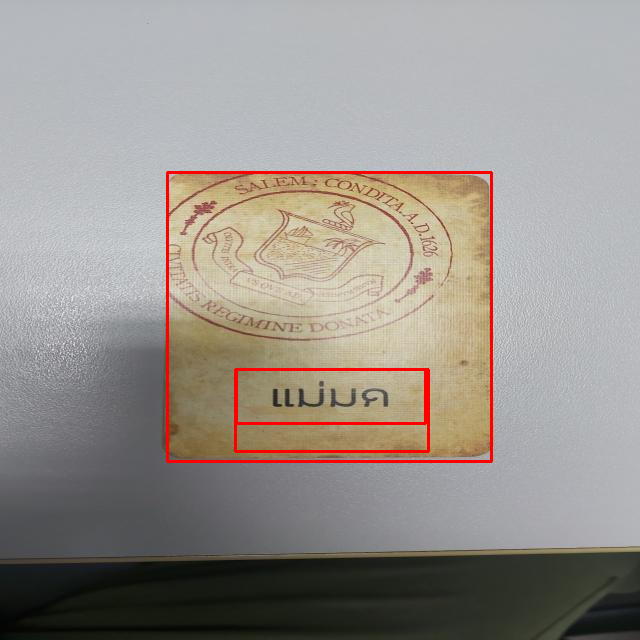

In [6]:
import cv2
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
#read image
image = cv2.imread('/content/test/images/20240402_155606_jpg.rf.d846e8be1952d5dc0be64773300abf3d.jpg', 1)

model = YOLO('/content/runs/detect/train_result2/weights/best.pt')
res = image.copy()

results = model(image, conf = 0.25, iou = 0.7)  # return a list of Results objects

boxes = results[0].boxes
objs = boxes.cpu().numpy() #Convert bounding box to numpy

obj_list = model.names


if objs.shape[0] != 0: # Check number of detected objs > 0
  interested_obj_count = 0
  for obj in objs:
    detected_obj = obj_list[int(obj.cls[0])]
    if detected_obj == 'witch':
      interested_obj_count += 1
      x0, y0, x1, y1 = obj.xyxy[0].astype(int)
      #conf = obj.conf[0]
      res = cv2.rectangle(res, (int(x0), int(y0)), (int(x1), int(y1)), (0, 0, 255),  2)

cv2_imshow(res)